<a href="https://colab.research.google.com/github/Lakshmi-Priya-Y/FMML_projects_labs_2024/blob/main/AIML_III_Module_01_Lab_02_Machine_Learning_terms_and_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [485]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

rng = np.random.default_rng(seed=42)

Using Diabetes Dataset from sklearn

In [486]:
from sklearn.datasets import load_diabetes
dataset = load_diabetes()
print(dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [487]:
print("Original Target Values: ",dataset.target)
dataset.target = dataset.target.astype(int)
print("Target values after conversion: ",dataset.target)
print("Input variables shape: ",dataset.data.shape)
print("Output variables shape: ",dataset.target.shape)

Original Target Values:  [151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  

In [488]:
def nn1(traindata,trainlabel,query):
  difference = (traindata - query)
  square = difference*difference
  distance = np.sqrt(square.sum(axis = 1))
  label = trainlabel[np.argmin(distance)]
  return label

def nn(traindata,trainlabel,testdata,n_neighbors=1):
  predictlabel = np.array([nn1(traindata,trainlabel,i) for i in testdata])
  return predictlabel

Random Classifier

In [489]:
def RandomClassifier(traindata,trainlabel,testdata):
  classes = np.unique(trainlabel)
  rints = np.random.randint(low=0,high=len(classes),size= len(testdata))
  predictlabel =  classes[rints]
  return predictlabel

Accuracy

In [490]:
def accuracy(gtlabel,predlabel):
  assert len(gtlabel) == len(predlabel)
  correct = (gtlabel == predlabel).sum()
  return correct/len(gtlabel)

Splitting the dataset into training and testing sets

In [491]:
def split(data, label, percent, random_state=None):
  if not (0 <= percent <= 1):
    raise ValueError("Validation percentage must be between 0 and 1.")

  if random_state is not None:
    np.random.seed(random_state)

  rnd = np.random.rand(len(label))  # Generate random values

  split1 = rnd < percent
  split2 = rnd >= percent

  split1data = data[split1, :]
  split1label = label[split1]
  split2data = data[split2, :]
  split2label = label[split2]

  return split1data, split1label, split2data, split2label


Reserving 20% of dataset as the test set

In [492]:
testdata,testlabel,alltraindata,alltrainlabel = split(dataset.data,dataset.target,20/100)
print("Number of test samples: ",len(testlabel))
print("Number of train samples: ",len(alltrainlabel))
print("Percent of test data: ",len(testlabel)*100/len(dataset.target),"%")

Number of test samples:  96
Number of train samples:  346
Percent of test data:  21.71945701357466 %


#Experiments with splits

Reserving some of training data as validation set

In [493]:
traindata,trainlabel,valdata,vallabel = split(alltraindata,alltrainlabel,75/100)


Accuracy of classifiers on the training dataset

In [494]:
trainpred = nn(traindata,trainlabel,traindata)
trainAccuracy =  accuracy(trainlabel,trainpred)
print("Training accuracy using Nearest Neighbour Algorithm: ",trainAccuracy*100,"%")

trainpred = RandomClassifier(traindata,trainlabel,traindata)
trainAccuracy = accuracy(trainlabel,trainpred)
print("Training accuracy using Random Classifier: ",trainAccuracy*100,"%")

Training accuracy using Nearest Neighbour Algorithm:  100.0 %
Training accuracy using Random Classifier:  0.411522633744856 %


In [495]:
valpred = nn(traindata,trainlabel,valdata)
valAccuracy = accuracy(vallabel,valpred)
print("Validation accuracy using Nearest Neighbour algorithm: ",valAccuracy*100,"%")

valpred = RandomClassifier(traindata,trainlabel,valdata)
valAccuracy = accuracy(vallabel,valpred)
print("Validation accuracy using Random Classifier: ",valAccuracy*100,"%")

Validation accuracy using Nearest Neighbour algorithm:  0.9708737864077669 %
Validation accuracy using Random Classifier:  0.9708737864077669 %


In [496]:
#Trying another random split and checking the validation accuracy
traindata,trainlabel,valdata,vallabel = split(alltraindata,alltrainlabel,75/100)
valpred = nn(traindata,trainlabel,valdata)
valAccuracy  = accuracy(vallabel,valpred)
print("Validation accuracy using nearest neighbour algorithm: ",valAccuracy*100,"%")

Validation accuracy using nearest neighbour algorithm:  0.0 %


Accuracy of the Test data set

In [497]:
testpred = nn(alltraindata,alltrainlabel,testdata)
testAccuracy = accuracy(testlabel,testpred)
print("Test Accuracy: ",testAccuracy*100,"%")

Test Accuracy:  3.125 %


1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?

In [498]:
#Increasing the percentage of the validation set
traindata,trainlabel,valdata,vallabel = split(alltraindata,alltrainlabel,85/100)
valpred = nn(traindata,trainlabel,valdata)
valAccuracy = accuracy(vallabel,valpred)
print("Validation accuracy using nearest neighbour algorithm: ",valAccuracy*100,"%")

valpred = RandomClassifier(traindata,trainlabel,valdata)
valAccuracy = accuracy(vallabel,valpred)
print("Validation accuracy using Random Classifier: ",valAccuracy*100,"%")

Validation accuracy using nearest neighbour algorithm:  0.0 %
Validation accuracy using Random Classifier:  0.0 %


In [499]:
#Decreasing the percentage of the validation set
traindata,trainlabel,valdata,vallabel = split(alltraindata,alltrainlabel,20/100)
valpred = nn(traindata,trainlabel,valdata)
valAccuracy = accuracy(vallabel,valpred)
print("Validation accuracy using nearest neighbour algorithm: ",valAccuracy*100,"%")

valpred = RandomClassifier(traindata,trainlabel,valdata)
valAccuracy = accuracy(vallabel,valpred)
print("Validation accuracy using Random Classifier: ",valAccuracy*100,"%")

Validation accuracy using nearest neighbour algorithm:  0.0 %
Validation accuracy using Random Classifier:  0.0 %


It is observed that the validation accuracy is directly proportional to the
percentage of the validation set

2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?


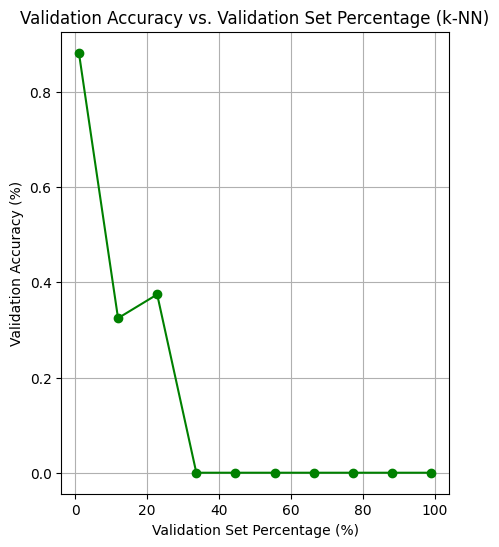

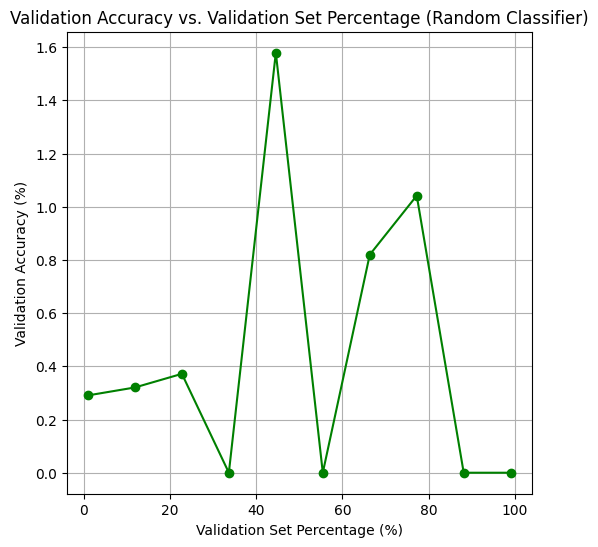

In [500]:
validation_percentages = np.linspace(0.01,0.99,10)
validation_accuracies = []
for i in validation_percentages:
  traindata,trainlabel,valdata,vallabel = split(alltraindata,alltrainlabel,i,None)
  valpred = nn(traindata,trainlabel,valdata)
  valAccuracy = accuracy(vallabel,valpred)
  validation_accuracies.append(valAccuracy)


plt.figure(figsize=(5,6))
plt.plot(validation_percentages*100,np.array(validation_accuracies)*100,marker='o',linestyle='-',color = 'g')
plt.xlabel('Validation Set Percentage (%)')
plt.ylabel('Validation Accuracy (%)')
plt.title('Validation Accuracy vs. Validation Set Percentage (k-NN)')
plt.grid(True)
plt.show()
print()


val_accuracies = []
for i in validation_percentages:
  traindata,trainlabel,valdata,vallabel = split(alltraindata,alltrainlabel,i,None)
  valpred = RandomClassifier(traindata,trainlabel,valdata)
  valAccuracy = accuracy(vallabel,valpred)
  val_accuracies.append(valAccuracy)

plt.figure(figsize=(6,6))
plt.plot(validation_percentages*100,np.array(val_accuracies)*100,marker='o',linestyle='-',color = 'g')
plt.xlabel('Validation Set Percentage (%)')
plt.ylabel('Validation Accuracy (%)')
plt.title('Validation Accuracy vs. Validation Set Percentage (Random Classifier)')
plt.grid(True)
plt.show()

3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

20% of validation set is the common split that provides a reasonable trade off between training and validation data sizes.

# Exercise: Try to implement a 3 nearest neighbour classifier and compare the accuracy of the 1 nearest neighbour classifier and the 3 nearest neighbour classifier on the test dataset. You can use the KNeighborsClassifier class from the scikit-learn library to implement the K-Nearest Neighbors model. You can set the number of neighbors using the n_neighbors parameter. You can also use the accuracy_score function from the scikit-learn library to calculate the accuracy of the model.

1-NN Classifier Accuracy: 3.12%
3-NN Classifier Accuracy: 0.00%


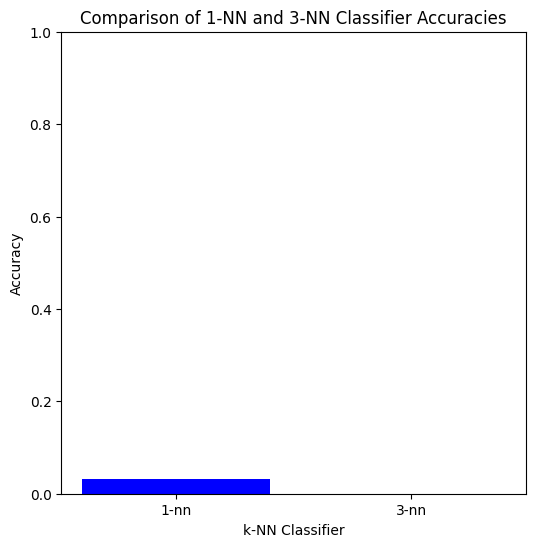

In [501]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


def knn(n_neighbors):
  kn = KNeighborsClassifier(n_neighbors=n_neighbors)
  kn.fit(alltraindata,alltrainlabel)
  y_pred = kn.predict(testdata)
  Accuracy = accuracy_score(testlabel,y_pred)
  return Accuracy

accuracy_1nn = knn(1)
print("1-NN Classifier Accuracy: {:.2f}%".format(accuracy_1nn * 100))

accuracy_3nn = knn(3)
print("3-NN Classifier Accuracy: {:.2f}%".format(accuracy_3nn * 100))


accuracies = [accuracy_1nn,accuracy_3nn]
knn_labels = ['1-nn','3-nn']


plt.figure(figsize = (6,6))
plt.bar(knn_labels,accuracies,color=['blue','green'])
plt.xlabel('k-NN Classifier')
plt.ylabel('Accuracy')
plt.title('Comparison of 1-NN and 3-NN Classifier Accuracies')
plt.ylim(0, 1)
plt.show()

#Multiple Splits

In [502]:
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=nn):
    total_accuracy = 0
    for ii in range(iterations):
        rnd = np.random.rand(len(alllabel))
        traindata, trainlabel, valdata, vallabel = split( alldata, alllabel, splitpercent,rnd)
        valpred = classifier(traindata, trainlabel, valdata)
        total_accuracy += accuracy_score(vallabel, valpred)
    return accuracy / iterations  # average of all accuracies

In [ ]:
avg_acc = AverageAccuracy(alltraindata, alltrainlabel, 75 / 100, 10, classifier=nn)
print("Average validation accuracy:", avg_acc*100, "%")
testpred = nn(alltraindata, alltrainlabel, testdata)

print("Test accuracy:", accuracy_score(testlabel, testpred)*100, "%")

In [ ]:
split_sizes = np.linspace(0.1, 0.9, 9)  # 10% to 90% split sizes
iterations = 10

# Store accuracy results for 1-NN and 3-NN classifiers
accuracies_1nn = []
accuracies_3nn = []

# Iterate over split sizes and calculate accuracies
for split_size in split_sizes:
    avg_acc_1nn = AverageAccuracy(dataset.data, dataset.target, split_size, iterations, classifier=nn, n_neighbors=1)
    avg_acc_3nn = AverageAccuracy(dataset.data, dataset.target, split_size, iterations, classifier=nn, n_neighbors=3)

    accuracies_1nn.append(avg_acc_1nn)
    accuracies_3nn.append(avg_acc_3nn)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(split_sizes * 100, np.array(accuracies_1nn) * 100, marker='o', linestyle='-', color='b', label='1-NN')
plt.plot(split_sizes * 100, np.array(accuracies_3nn) * 100, marker='o', linestyle='-', color='g', label='3-NN')
plt.xlabel('Training Data Percentage (%)')
plt.ylabel('Average Validation Accuracy (%)')
plt.title('Comparison of 1-NN and 3-NN Classifiers Across Different Split Sizes')
plt.legend()
plt.grid(True)
plt.show()